# **PROJECT - LSTM BASED NEXT WORD PREDICTION DEEP LEARNING MODEL FOR TEXT GENERATION**


## **Project Description**
This project focuses on predicting the next word in a sequence using a deep learning model based on Long Short-Term Memory (LSTM) networks. By leveraging the sequential nature of text data, the model generates contextually relevant words, enabling applications like text completion and content generation.

## **Dataset**

We used a text dataset containing structured sentences for training. The dataset was preprocessed through:

Tokenization and text cleaning (removal of special characters and lowercasing).
Preparation of input-output pairs for supervised learning.
One-hot encoding to map words into numerical form.

## **Model Architecture**
The model was implemented using TensorFlow and Keras, featuring:

**Embedding Layer**: Converts words into dense vector representations.

**LSTM Layers**: Captures sequential patterns and long-term dependencies.

**Dense Output Layer**: Predicts the next word using softmax activation.

## Importing Necessary Libraries

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq


## Loading Data

In [2]:
import requests

# URL of the text file
url = 'https://raw.githubusercontent.com/harshawardhanchitnis/Project-Machine-Learning-LSTM-Based-Next-Word-Generation-Deep-Learning-Model-For-Text-Generation/b66d3af2e9ae6520ca979e452f84988e5c7a239a/LSTM%20Project%20Text.txt'

# Send an HTTP request to the URL and retrieve the text content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    text = response.text.lower()
    print('corpus length:', len(text))
else:
    print('Failed to retrieve the text file from the URL.')


corpus length: 594198


## Data Processing

In [3]:
# Creating a list of unique characters and character indices
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
print(f'unique chars: {len(character)}')


unique chars: 74


## Chunking the Data into Sequences

In [4]:
# chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')


num training examples: 198053


## **One-Hot Encoding of the Data**

In [5]:
# One-hot encode the data
X = np.zeros((len(sentences), seq_len, len(character)), dtype=bool)  # Use built-in bool instead of np.bool
y = np.zeros((len(sentences), len(character)), dtype=bool)  # Use built-in bool instead of np.bool

# One-hot encoding process
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


## **Creating the Model**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │         103,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 74)                  │           9,546 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 74)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,482 (443.29 KB)

 Trainable params: 113,482 (443.29 KB)

 Non-trainable params: 0 (0.00 B)

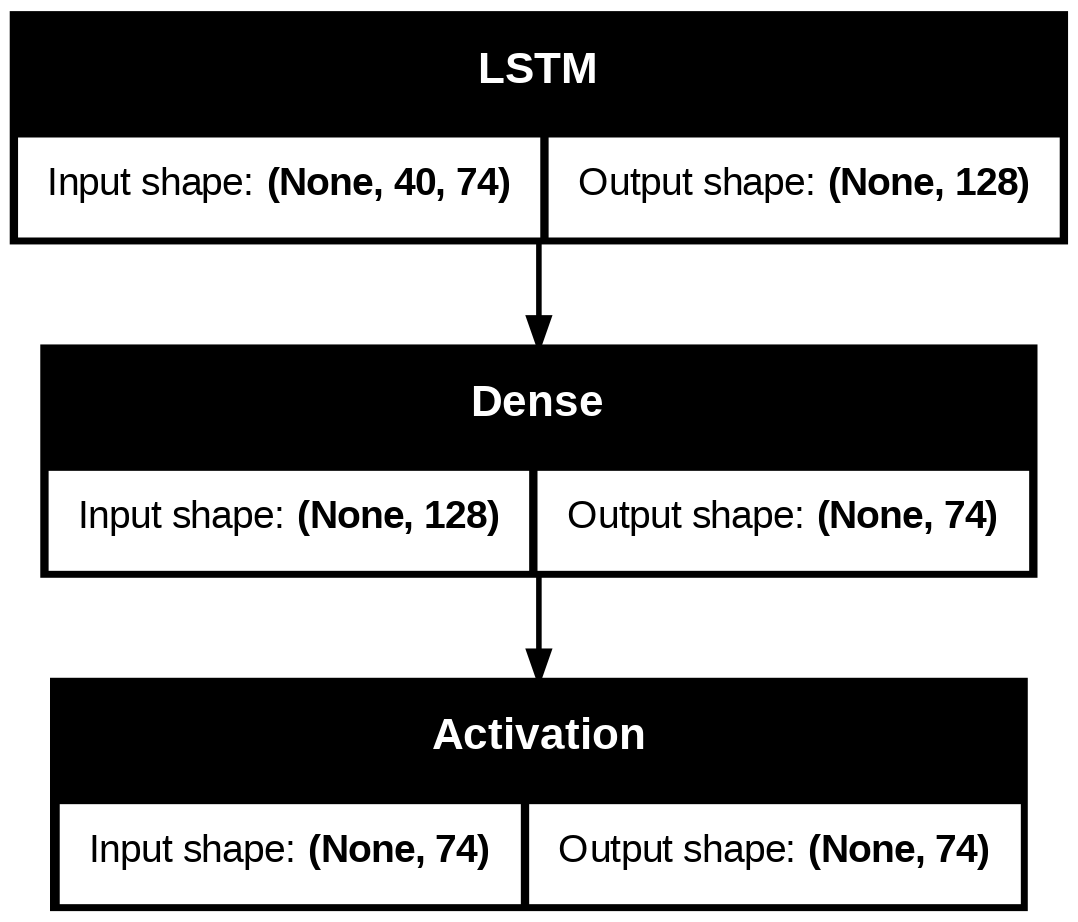

In [6]:
# Create the LSTM-based model
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

# Summarize the model architecture
model.summary()

# Plot the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')


## Training the Model

In [ ]:
# Compile and train the model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01,
                    batch_size=128,
                    epochs=30,
                    shuffle=True).history

# Saving the model and history
model.save('keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

# Loading the model and history
model = load_model('keras_model.h5')
history = pickle.load(open("history.p", "rb"))


Epoch 1/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 197s 127ms/step - accuracy: 0.3387 - loss: 2.3186 - val_accuracy: 0.4165 - val_loss: 2.1795
Epoch 2/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 203s 128ms/step - accuracy: 0.4946 - loss: 1.6926 - val_accuracy: 0.4563 - val_loss: 1.9886
Epoch 3/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 201s 128ms/step - accuracy: 0.5351 - loss: 1.5539 - val_accuracy: 0.4750 - val_loss: 1.9321
Epoch 4/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 205s 129ms/step - accuracy: 0.5542 - loss: 1.4818 - val_accuracy: 0.4907 - val_loss: 1.9065
Epoch 5/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 202s 130ms/step - accuracy: 0.5661 - loss: 1.4373 - val_accuracy: 0.5043 - val_loss: 1.8896
Epoch 6/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.5736 - loss: 1.4089 - val_accuracy: 0.4942 - val_loss: 1.9193
Epoch 7/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 203s 129ms/step - accuracy: 0.5800 - loss: 1.3871 - val_accuracy: 0.5033 - val_loss: 1.9064
Epoch 8/30
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 202s 129ms/step - ac

##  Model Evaluation

In [ ]:
# Evaluate the model
loss_and_acc = model.evaluate(X, y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

# Plot training & validation accuracy and loss
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()


## Preparing the Input for Prediction

In [9]:
# Prepare the input text for the model
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
    return x


## Sampling Function for Prediction

In [10]:
# Sample function to predict based on the model output
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)


## Predicting Text Completion

In [11]:
# Predict completion of the given text
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char

        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion


## Predicting Multiple Completions

In [14]:
def predict_completions(text, n=3, temperature=1.0):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]

    # Adjust predictions using the temperature
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-7) / temperature  # Add small value to avoid log(0)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    # Get the top n predictions
    next_indices = heapq.nlargest(n, range(len(preds)), preds.take)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]


## Testing Predictions

In [15]:
# Example input sequences for predictions
quotes = [
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "Machine learning  is the study of computer algorithms that improve automatically through experience and by the use of data.",
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.",
    "Thanks for spending your precious time to view my work."
]

# Generating predictions for each input sequence
for q in quotes:
    seq = q[:40].lower()  # Use the first 40 characters for prediction
    print("Input Sequence: ", seq)
    completions = predict_completions(seq, n=5, temperature=0.7)  # Add temperature parameter
    for i, completion in enumerate(completions, 1):
        print(f"Prediction {i}: {completion}")
    print()


Input Sequence:  deep learning is subset of machine learn
Prediction 1: ed 
Prediction 2:  the 
Prediction 3: ory. 
Prediction 4: abless 
Prediction 5: ing 

Input Sequence:  machine learning  is the study of comput
Prediction 1: ion 
Prediction 2: hy 
Prediction 3: s, 
Prediction 4:  the 
Prediction 5: ation 

Input Sequence:  it is not a lack of love, but a lack of 
Prediction 1: the 
Prediction 2: a 
Prediction 3: his 
Prediction 4: secioned 
Prediction 5: burning 

Input Sequence:  recurrent neural network (rnn) is a type
Prediction 1: mist 
Prediction 2: ssice 
Prediction 3: cing 
Prediction 4: nty 
Prediction 5: ping 

Input Sequence:  thanks for spending your precious time t
Prediction 1: hat 
Prediction 2: o 
Prediction 3: imm 
Prediction 4: ranberess 
Prediction 5: ack 



# **SUMMARY :**
## **This project focused on building an LSTM-based text generation model to predict text sequences. We preprocessed the data, implemented one-hot encoding, and created training sequences. The LSTM model, trained with categorical cross-entropy loss and RMSprop optimizer, demonstrated its ability to learn patterns in the text.**

# **CLOSING REMARK :**
## **This project showcased the power of LSTM networks in natural language processing. Despite some limitations, it provided a strong foundation for understanding text generation tasks. Future improvements, such as using larger datasets and advanced tuning, could make the model more robust and versatile for practical applications like chatbots and automated writing tools.**